# Application of ML Classifiers to Identify Aged Cells

During this homework, aged and youthful RBCs will be classified based on DNA methylation profiles.

This homework will:

* Compare performance of various classification algorithms

* Evaluate effects of train/test split on classifier performance



Data for this homework comes from GEO GSE40279: [Hannum, G.; Guinney, J.; Zhao, L.; Zhang, L.; Hughes, G.; Sadda, S.; Klotzle, B.; Bibikova, M.; Fan, J.-B.; Gao, Y.; Deconde, R.; Chen, M.; Rajapakse, I.; Friend, S.; Ideker, T.; Zhang, K. Genome-Wide Methylation Profiles Reveal Quantitative Views of Human Aging Rates. Mol Cell 2013, 49 (2), 359–367.](https://doi.org/10.1016/j.molcel.2012.10.016)

## Problem Statements:

1. Plot the age distribution of subjects using a histogram. Add a vertical line to the plot at age 65.

<br/>

2. Label subjects using two groups: "youthful" (ages <65) and "aged" (ages >=65). This age threshold divides the subjects into two groups of approximately equal size.

<br/>

3. Randomly assign 20% of all subjects to a training set. Assign the remaining 80% of subjects to a test set.

<br/>

4. Train an SVM and logistic regression classifier to predict age labels ("youthful" or "aged") using subjects in the **training set** based on CpG methylation levels. **Note:** When training your SVM classifier, use a linear kernel.

<br/>

5. Evaluate each classifier's performance on the **test set** by reporting classification accuracy.

<br/>

6. Repeat questions 3-5 for a 80%/20% train/test split. How does increasing the training set size affect classifier performance?

<br/>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

## Load Blood Cell DNA Methylation Data




In [3]:
CpG_methylation = pd.read_csv('blood_top_CpGs.csv', index_col=0, header=0).drop(labels="age", axis=1)

print("Shape of Data Set: ")
print()
print(CpG_methylation.shape)
print()
CpG_methylation.head()

Shape of Data Set: 

(656, 3231)



,cg00320765,cg04223956,cg03407966,cg07403374,cg10122230,cg24603972,cg04105597,cg12613081,cg20169734,cg06012428,...,cg04820440,cg12662162,cg18527971,cg24367761,cg13027280,cg14801864,cg04984575,cg24836583,cg18079534,cg17362351
GSM989827,0.785241,0.906154,0.943392,0.945140,0.904783,0.925199,0.939552,0.927781,0.907609,0.562828,...,0.905512,0.113116,0.862678,0.920586,0.918897,0.388287,0.492888,0.015052,0.879088,0.929998
GSM989828,0.811994,0.883670,0.937935,0.938376,0.929686,0.930090,0.945331,0.927932,0.889046,0.494343,...,0.858246,0.086961,0.839228,0.907824,0.893503,0.302853,0.481399,0.022104,0.887265,0.920493
GSM989829,0.771808,0.893670,0.947600,0.915895,0.914621,0.917694,0.953757,0.901260,0.905771,0.538240,...,0.890826,0.124099,0.868137,0.891428,0.899440,0.372548,0.510238,0.012122,0.899792,0.936039
GSM989830,0.800116,0.905407,0.930441,0.922973,0.891672,0.923459,0.951738,0.899530,0.881363,0.533346,...,0.902694,0.087692,0.830208,0.910664,0.921690,0.366668,0.511379,0.021467,0.924791,0.951897
GSM989831,0.799606,0.882730,0.963902,0.909886,0.918864,0.939070,0.964011,0.923141,0.897723,0.604858,...,0.883601,0.098855,0.857063,0.891470,0.904103,0.407622,0.455352,0.021815,0.893462,0.939561


## Load Sample Ages

In [5]:
subject_ages = pd.read_csv("subject_ages.csv", index_col=0, header=None)

subject_ages.head()

,1
0,
GSM989827,67.0
GSM989828,89.0
GSM989829,66.0
GSM989830,64.0
GSM989831,62.0


## Solutions

1. Plot the age distribution of subjects using a histogram. Add a vertical line to the plot at age 65.

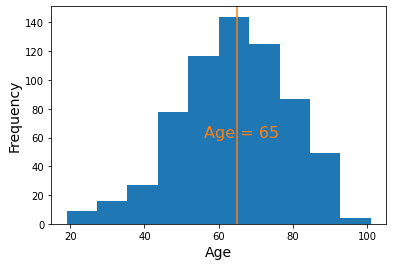

In [29]:
age = subject_ages[1]

plt.figure(figsize = (6,4))
plt.hist(age)  
plt.axvline(x=65, color = 'C1')
plt.text(56, 60, 'Age = 65', color = 'C1', fontsize=16)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.show()

2. Label subjects using two groups: "youthful" (ages <65) and "aged" (ages >=65). This age threshold divides the subjects into two groups of approximately equal size.

In [11]:
subject_ages.loc[subject_ages[1] >= 65, 'Label'] = 1
subject_ages.loc[subject_ages[1] < 65, 'Label'] = 0
subject_ages.head()

,1,Lable,Label
0,,,
GSM989827,67.0,1.0,1.0
GSM989828,89.0,1.0,1.0
GSM989829,66.0,1.0,1.0
GSM989830,64.0,0.0,0.0
GSM989831,62.0,0.0,0.0


3. Randomly assign 20% of all subjects to a training set. Assign the remaining 80% of subjects to a test set.

In [12]:
t_cen = CpG_methylation.values
x_cen = np.array(subject_ages['Label'].tolist())

t_train, t_test, x_train, x_test = train_test_split(t_cen, x_cen, test_size=0.8, random_state = 0)

4. Train an SVM and logistic regression classifier to predict age labels ("youthful" or "aged") using subjects in the **training set** based on CpG methylation levels. **Note:** When training your SVM classifier, use a linear kernel.

In [13]:
clf = svm.SVC(kernel="linear")
clf.fit(t_train, x_train)
print(clf)

SVC(kernel='linear')


In [14]:
clf_logreg = LogisticRegression(solver = 'newton-cg')
clf_logreg.fit(t_train, x_train)

LogisticRegression(solver='newton-cg')

5. Evaluate each classifier's performance on the **test set** by reporting classification accuracy.

In [25]:
# Calculate prediction accuracy and generate confusion matrix
print("Accuracy of svm classifier: " + str(clf.score(t_test, x_test)))

Accuracy of svm classifier: 0.8484848484848485


In [26]:
print("Accuracy of logistic regression classifier: " + str(clf_logreg.score(t_test, x_test)))

Accuracy of logistic regression classifier: 0.8409090909090909


6. Repeat questions 3-5 for a 80%/20% train/test split. How does increasing the training set size affect classifier performance?

In [21]:
t_train, t_test, x_train, x_test = train_test_split(t_cen, x_cen, test_size=0.2, random_state = 0)

In [23]:
clf = svm.SVC(kernel="linear")
clf.fit(t_train, x_train)
print("Accuracy of svm classifier: " + str(clf.score(t_test, x_test)))

Accuracy of svm classifier: 0.8484848484848485


In [24]:
clf_logreg = LogisticRegression(solver = 'newton-cg')
clf_logreg.fit(t_train, x_train)
print("Accuracy of logistic regression classifier: " + str(clf_logreg.score(t_test, x_test)))

Accuracy of logistic regression classifier: 0.8409090909090909


**Answer : Increasing the training set size improve the classifier performance, increasing the accuracy.**